In [15]:
# Importing libraries and setting display options
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from re import sub
from decimal import Decimal
from matplotlib import pyplot as plt
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [16]:
# Opening dataset and creating a copy 
listings = pd.read_csv("/Users/leoer/desktop/career/projects/git-projects/lisbon_airbnb/complete_listings.csv")
listing_raw = listings.copy()

In [17]:
listings.head(5)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,6499,https://www.airbnb.com/rooms/6499,20190722181225,2019-07-23,Belém 1 Bedroom Historical Apartment,"This apartment is all about Location, next to ...",Fully furnished apartment (35m2). Small inside...,"This apartment is all about Location, next to ...",none,"To get to the city center, tram 15 stops in f...",Late check in's (after 20H) have an extra char...,The apartment is on the same street as the #15...,The entire apartment is at your disposal.,We'll check you in personally,Respect the neighbours.,NaN,NaN,https://a0.muscache.com/im/pictures/6422ee92-c...,NaN,14455,https://www.airbnb.com/users/show/14455,Bruno,2009-04-22,"Brussels, Bruxelles, Belgium","I am Bruno Luis, a Portuguese living in The Ha...",within an hour,100%,NaN,f,https://a0.muscache.com/im/users/14455/profile...,https://a0.muscache.com/im/users/14455/profile...,NaN,1.0,1.0,"['email', 'phone', 'reviews']",t,f,"Lisbon, Lisbon, Portugal",Belém,Belm,Lisboa,Lisbon,Lisbon,1300,Lisbon,"Lisbon, Portugal",PT,Portugal,38.69675,-9.19840,t,Apartment,Entire home/apt,3,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""First ai...",377.0,$36.00,$209.00,$579.00,$100.00,$35.00,2,$15.00,3,365,3,3,365,365,3.0,365.0,today,t,2,4,6,278,2019-07-23,10,1,2014-09-02,2019-05-21,98.0,10.0,8.0,10.0,10.0,10.0,10.0,t,NaN,"{Lisbon,"" PT Zipcodes"","" Lisbon"","" PT""}",t,f,moderate,f,f,1,1,0,0,0.17
1,25659,https://www.airbnb.com/rooms/25659,20190722181225,2019-07-23,"Sunny, Alfama Sleeps 3 - Coeur d'Alfama",Heart of Alfama! Center of Lisbon. Sunny Char...,Charming sunny apartment in the heart of Alfam...,Heart of Alfama! Center of Lisbon. Sunny Char...,none,Alfama is the oldest and most picturesque quar...,CHECK-IN 15h -24h ( 3pm - midnight) CHECK-O...,The apartment is very convenient to all kinds ...,CHECK-IN 15h -24h ( 3pm - midnight) CHECK-O...,I am available by email ( or in person if I am...,No smoking. No pets. Only booked guests are en...,NaN,NaN,https://a0.muscache.com/im/pictures/a4c86b5f-c...,NaN,107347,https://www.airbnb.com/users/show/107347,Ellie,2010-04-12,"New York, New York, United States",Artist,within an hour,100%,NaN,t,https://a0.muscache.com/im/pictures/7b258922-5...,https://a0.muscache.com/im/pictures/7b258922-5...,Alfama,1.0,1.0,"['email', 'phone', '

In [18]:
refined_listings = listings[['id', 'host_id', 'name', 'summary', 'street', 'neighbourhood', 'neighbourhood_cleansed', 'city', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'price', 'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people' ]]

In [19]:
refined_listings.shape

(25085, 22)

In [20]:
refined_listings.id.nunique()

25085

In [21]:
null_cols = refined_listings.isnull().sum()
null_cols

id                            0
host_id                       0
name                         25
summary                     899
street                        0
neighbourhood              6633
neighbourhood_cleansed        0
city                        152
latitude                      0
longitude                     0
property_type                 0
room_type                     0
accommodates                  0
bathrooms                    35
bedrooms                     15
price                         0
weekly_price              23131
monthly_price             23347
security_deposit           6598
cleaning_fee               4919
guests_included               0
extra_people                  0
dtype: int64

In [22]:
refined_listings.drop(['weekly_price', 'monthly_price'], inplace = True, axis = 1)
refined_listings.head(5)

,id,host_id,name,summary,street,neighbourhood,neighbourhood_cleansed,city,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,price,security_deposit,cleaning_fee,guests_included,extra_people
0,6499,14455,Belém 1 Bedroom Historical Apartment,"This apartment is all about Location, next to ...","Lisbon, Lisbon, Portugal",Belém,Belm,Lisbon,38.69675,-9.19840,Apartment,Entire home/apt,3,1.0,1.0,$36.00,$100.00,$35.00,2,$15.00
1,25659,107347,"Sunny, Alfama Sleeps 3 - Coeur d'Alfama",Heart of Alfama! Center of Lisbon. Sunny Char...,"Lisboa, Lisboa, Portugal",Alfama,Santa Maria Maior,Lisboa,38.71167,-9.12696,Apartment,Entire home/apt,3,1.0,1.0,$60.00,$150.00,$30.00,2,$0.00
2,28066,120855,ear the birds,NaN,"Azambuja, Portugal",NaN,Aveiras de Cima,Azambuja,39.14654,-8.91503,House,Private room,2,NaN,1.0,$53.00,NaN,NaN,1,$0.00
3,29138,125304,Room for rent in shared house,NaN,"Lisbon, Lisbon, Portugal",São João de Deus,Areeiro,Lisbon,38.73634,-9.13792,Apartment,Private room,1,NaN,1.0,$71.00,NaN,NaN,1,$0.00
4,29248,125768,Apartamento Alfama com vista para o rio!,NaN,"Lisbon, Lisbon, Portugal",Alfama,Santa Maria Maior,Lisbon,38.71272,-9.12628,Apartment,Entire home/apt,4,1.0,1.0,$60.00,$0.00,$40.00,2,$10.00


In [53]:
refined_listings.loc[refined_listings['neighbourhood'].isnull(),'neighbourhood'] = refined_listings['neighbourhood_cleansed']
refined_listings.head(10)

KeyError: 'neighbourhood_cleansed'

In [24]:
refined_listings.drop(['neighbourhood_cleansed'], inplace = True, axis = 1)
refined_listings.head(10)

,id,host_id,name,summary,street,neighbourhood,city,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,price,security_deposit,cleaning_fee,guests_included,extra_people
0,6499,14455,Belém 1 Bedroom Historical Apartment,"This apartment is all about Location, next to ...","Lisbon, Lisbon, Portugal",Belém,Lisbon,38.69675,-9.19840,Apartment,Entire home/apt,3,1.0,1.0,$36.00,$100.00,$35.00,2,$15.00
1,25659,107347,"Sunny, Alfama Sleeps 3 - Coeur d'Alfama",Heart of Alfama! Center of Lisbon. Sunny Char...,"Lisboa, Lisboa, Portugal",Alfama,Lisboa,38.71167,-9.12696,Apartment,Entire home/apt,3,1.0,1.0,$60.00,$150.00,$30.00,2,$0.00
2,28066,120855,ear the birds,NaN,"Azambuja, Portugal",Aveiras de Cima,Azambuja,39.14654,-8.91503,House,Private room,2,NaN,1.0,$53.00,NaN,NaN,1,$0.00
3,29138,125304,Room for rent in shared house,NaN,"Lisbon, Lisbon, Portugal",São João de Deus,Lisbon,38.73634,-9.13792,Apartment,Private room,1,NaN,1.0,$71.00,NaN,NaN,1,$0.00
4,29248,125768,Apartamento Alfama com vista para o rio!,NaN,"Lisbon, Lisbon, Portugal",Alfama,Lisbon,38.71272,-9.12628,Apartment,Entire home/apt,4,1.0,1.0,$60.00,$0.00,$40.00,2,$10.00
5,29396,126415,Alfama Hill - Boutique apartment,Feel at home in the historic centre of Lisbon.,"Lisbon, Lisbon, Portugal",Alfama,Lisbon,38.71239,-9.12887,Apartment,Entire home/apt,4,1.0,1.0,$60.00,$150.00,NaN,2,$20.00
6,29720,128075,TheHOUSE - Your luxury home,"A house at the top of an anonimous building, T...","Lisbon, Portugal",Estrella/Lapa,Lisbon,38.71195,-9.15877,Apartment,Entire home/apt,16,8.0,9.0,"$1,000.00",$0.00,$50.00,2,$0.00
7,40817,176410,"Chiado, Alecrim walk to Riverfront","Street of Alecrim, (18th c. Street of the Ital...","Lisbon, Lisbon, Portugal",Encarnação,Lisbon,38.70953,-9.14255,Apartment,Entire home/apt,2,1.0,1.0,$60.00,$0.00,$25.00,2,$0.00
8,42519,136230,Nice Apart.BAIRRO ALTO (ADAMASTOR) 6-1º,O apartamento esta muito bem localizado num ba...,"Lisbon, Lisbon, Portugal",Santa Catarina,Lisbon,38.71082,-9.15090,Apartment,Entire home/apt,2,1.0,1.0,$50.00,$0.00,$20.00,2,$0.00
9,48025,218778,Apartment for renting in Lisbon,NaN,"Lisbon, Portugal",Bairro Alto,Lisbon,38.71309,-9.14392,Apartment,Entire home/apt,2,NaN,1.0,$65.00,NaN,NaN,1,$0.00


In [25]:
null_cols = refined_listings.isnull().sum()
null_cols

id                     0
host_id                0
name                  25
summary              899
street                 0
neighbourhood          0
city                 152
latitude               0
longitude              0
property_type          0
room_type              0
accommodates           0
bathrooms             35
bedrooms              15
price                  0
security_deposit    6598
cleaning_fee        4919
guests_included        0
extra_people           0
dtype: int64

In [26]:
print(refined_listings.head(1))

     id  host_id                                  name                                            summary                    street neighbourhood    city  latitude  longitude property_type        room_type  accommodates  bathrooms  bedrooms   price security_deposit cleaning_fee  guests_included extra_people
0  6499    14455  Belém 1 Bedroom Historical Apartment  This apartment is all about Location, next to ...  Lisbon, Lisbon, Portugal         Belém  Lisbon  38.69675    -9.1984     Apartment  Entire home/apt             3        1.0       1.0  $36.00          $100.00       $35.00                2       $15.00


In [27]:
refined_listings.loc[refined_listings['bathrooms'].isnull(),'bathrooms'] = 0
refined_listings = refined_listings.apply(lambda row: row.map(lambda x: int(float(x))) if row.name == 'bathrooms' else row)

refined_listings.loc[refined_listings['bedrooms'].isnull(),'bedrooms'] = 0
refined_listings = refined_listings.apply(lambda row: row.map(lambda x: int(float(x))) if row.name == 'bedrooms' else row)

In [28]:
refined_listings.head(5)

,id,host_id,name,summary,street,neighbourhood,city,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,price,security_deposit,cleaning_fee,guests_included,extra_people
0,6499,14455,Belém 1 Bedroom Historical Apartment,"This apartment is all about Location, next to ...","Lisbon, Lisbon, Portugal",Belém,Lisbon,38.69675,-9.19840,Apartment,Entire home/apt,3,1,1,$36.00,$100.00,$35.00,2,$15.00
1,25659,107347,"Sunny, Alfama Sleeps 3 - Coeur d'Alfama",Heart of Alfama! Center of Lisbon. Sunny Char...,"Lisboa, Lisboa, Portugal",Alfama,Lisboa,38.71167,-9.12696,Apartment,Entire home/apt,3,1,1,$60.00,$150.00,$30.00,2,$0.00
2,28066,120855,ear the birds,NaN,"Azambuja, Portugal",Aveiras de Cima,Azambuja,39.14654,-8.91503,House,Private room,2,0,1,$53.00,NaN,NaN,1,$0.00
3,29138,125304,Room for rent in shared house,NaN,"Lisbon, Lisbon, Portugal",São João de Deus,Lisbon,38.73634,-9.13792,Apartment,Private room,1,0,1,$71.00,NaN,NaN,1,$0.00
4,29248,125768,Apartamento Alfama com vista para o rio!,NaN,"Lisbon, Lisbon, Portugal",Alfama,Lisbon,38.71272,-9.12628,Apartment,Entire home/apt,4,1,1,$60.00,$0.00,$40.00,2,$10.00


In [29]:
refined_listings = refined_listings.apply(lambda row: row.map(lambda x: float(str(x).replace(',','').replace('$',''))) if row.name == 'price' else row)

In [30]:
refined_listings.loc[refined_listings['security_deposit'].isnull(),'security_deposit'] = 0
refined_listings = refined_listings.apply(lambda row: row.map(lambda x: float(str(x).replace(',','').replace('$',''))) if row.name == 'security_deposit' else row)

In [31]:
refined_listings.loc[refined_listings['cleaning_fee'].isnull(),'cleaning_fee'] = 0
refined_listings = refined_listings.apply(lambda row: row.map(lambda x: float(str(x).replace(',','').replace('$',''))) if row.name == 'cleaning_fee' else row)

In [32]:
final_listings = refined_listings.apply(lambda row: row.map(lambda x: float(str(x).replace(',','').replace('$',''))) if row.name == 'extra_people' else row)

In [33]:
final_listings.head(5)

,id,host_id,name,summary,street,neighbourhood,city,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,price,security_deposit,cleaning_fee,guests_included,extra_people
0,6499,14455,Belém 1 Bedroom Historical Apartment,"This apartment is all about Location, next to ...","Lisbon, Lisbon, Portugal",Belém,Lisbon,38.69675,-9.19840,Apartment,Entire home/apt,3,1,1,36.0,100.0,35.0,2,15.0
1,25659,107347,"Sunny, Alfama Sleeps 3 - Coeur d'Alfama",Heart of Alfama! Center of Lisbon. Sunny Char...,"Lisboa, Lisboa, Portugal",Alfama,Lisboa,38.71167,-9.12696,Apartment,Entire home/apt,3,1,1,60.0,150.0,30.0,2,0.0
2,28066,120855,ear the birds,NaN,"Azambuja, Portugal",Aveiras de Cima,Azambuja,39.14654,-8.91503,House,Private room,2,0,1,53.0,0.0,0.0,1,0.0
3,29138,125304,Room for rent in shared house,NaN,"Lisbon, Lisbon, Portugal",São João de Deus,Lisbon,38.73634,-9.13792,Apartment,Private room,1,0,1,71.0,0.0,0.0,1,0.0
4,29248,125768,Apartamento Alfama com vista para o rio!,NaN,"Lisbon, Lisbon, Portugal",Alfama,Lisbon,38.71272,-9.12628,Apartment,Entire home/apt,4,1,1,60.0,0.0,40.0,2,10.0


In [34]:
final_listings['extras_price'] = (final_listings['guests_included'] - 1) * final_listings['extra_people']

In [35]:
final_listings.head()

,id,host_id,name,summary,street,neighbourhood,city,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,price,security_deposit,cleaning_fee,guests_included,extra_people,extras_price
0,6499,14455,Belém 1 Bedroom Historical Apartment,"This apartment is all about Location, next to ...","Lisbon, Lisbon, Portugal",Belém,Lisbon,38.69675,-9.19840,Apartment,Entire home/apt,3,1,1,36.0,100.0,35.0,2,15.0,15.0
1,25659,107347,"Sunny, Alfama Sleeps 3 - Coeur d'Alfama",Heart of Alfama! Center of Lisbon. Sunny Char...,"Lisboa, Lisboa, Portugal",Alfama,Lisboa,38.71167,-9.12696,Apartment,Entire home/apt,3,1,1,60.0,150.0,30.0,2,0.0,0.0
2,28066,120855,ear the birds,NaN,"Azambuja, Portugal",Aveiras de Cima,Azambuja,39.14654,-8.91503,House,Private room,2,0,1,53.0,0.0,0.0,1,0.0,0.0
3,29138,125304,Room for rent in shared house,NaN,"Lisbon, Lisbon, Portugal",São João de Deus,Lisbon,38.73634,-9.13792,Apartment,Private room,1,0,1,71.0,0.0,0.0,1,0.0,0.0
4,29248,125768,Apartamento Alfama com vista para o rio!,NaN,"Lisbon, Lisbon, Portugal",Alfama,Lisbon,38.71272,-9.12628,Apartment,Entire home/apt,4,1,1,60.0,0.0,40.0,2,10.0,10.0


In [36]:
final_listings['final_price'] = final_listings['price'] + final_listings['cleaning_fee'] + final_listings['extras_price']

In [37]:
final_listings.head()

,id,host_id,name,summary,street,neighbourhood,city,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,price,security_deposit,cleaning_fee,guests_included,extra_people,extras_price,final_price
0,6499,14455,Belém 1 Bedroom Historical Apartment,"This apartment is all about Location, next to ...","Lisbon, Lisbon, Portugal",Belém,Lisbon,38.69675,-9.19840,Apartment,Entire home/apt,3,1,1,36.0,100.0,35.0,2,15.0,15.0,86.0
1,25659,107347,"Sunny, Alfama Sleeps 3 - Coeur d'Alfama",Heart of Alfama! Center of Lisbon. Sunny Char...,"Lisboa, Lisboa, Portugal",Alfama,Lisboa,38.71167,-9.12696,Apartment,Entire home/apt,3,1,1,60.0,150.0,30.0,2,0.0,0.0,90.0
2,28066,120855,ear the birds,NaN,"Azambuja, Portugal",Aveiras de Cima,Azambuja,39.14654,-8.91503,House,Private room,2,0,1,53.0,0.0,0.0,1,0.0,0.0,53.0
3,29138,125304,Room for rent in shared house,NaN,"Lisbon, Lisbon, Portugal",São João de Deus,Lisbon,38.73634,-9.13792,Apartment,Private room,1,0,1,71.0,0.0,0.0,1,0.0,0.0,71.0
4,29248,125768,Apartamento Alfama com vista para o rio!,NaN,"Lisbon, Lisbon, Portugal",Alfama,Lisbon,38.71272,-9.12628,Apartment,Entire home/apt,4,1,1,60.0,0.0,40.0,2,10.0,10.0,110.0


In [38]:
num_listings_per_neighbourhood = final_listings.groupby(['neighbourhood'])['id'].count()
num_listings_per_neighbourhood = num_listings_per_neighbourhood.sort_values(ascending=False).head(10)
num_listings_per_neighbourhood

neighbourhood
Alfama                  1579
Cascais e Estoril       1563
Baixa                   1347
São Jorge de Arroios    1035
Ericeira                 854
Anjos                    776
São Paulo                770
Santa Catarina           683
Mercês                   637
Coração de Jesus         613
Name: id, dtype: int64

Text(0.5, 1.0, 'TOP 10 MOST LISTED PORTUGUESE NEIGHBOURHOODS')

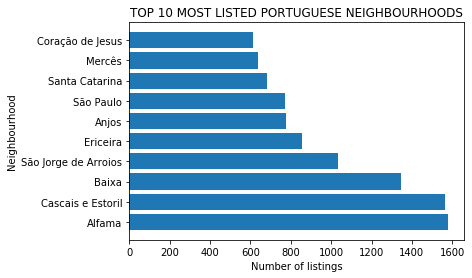

In [80]:
plt.barh(num_listings_per_neighbourhood.index,num_listings_per_neighbourhood)
plt.xlabel('Number of listings')
plt.ylabel('Neighbourhood')
plt.title('TOP 10 MOST LISTED PORTUGUESE NEIGHBOURHOODS')

In [81]:
mean_prices_per_neighbourhood = final_listings.groupby(['neighbourhood'])['final_price'].mean()
mean_prices_per_neighbourhood = mean_prices_per_neighbourhood.sort_values(ascending=False).head(10)
mean_prices_per_neighbourhood

neighbourhood
Freiria                                            423.500000
Cardosas                                           410.000000
Ramada e Caneas                                    346.043478
Mina de gua                                        294.833333
Vermelha                                           292.500000
Misericrdia                                        265.000000
Ota                                                259.000000
Aveiras de Baixo                                   244.000000
Almargem do Bispo, Pro Pinheiro e Montelavar       233.571429
Enxara do Bispo, Gradil e Vila Franca do Rosrio    222.909091
Name: final_price, dtype: float64

Text(0.5, 1.0, 'MEAN PRICES OF TOP 1O MOST LISTED PORTUGUESE NEIGHBOURHOODS')

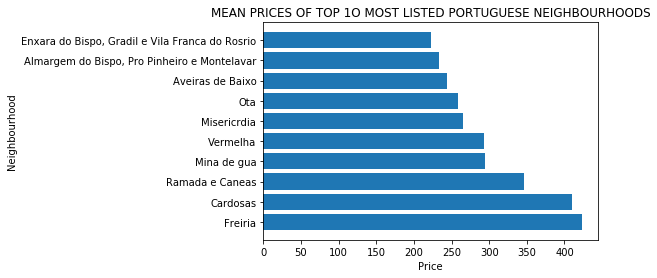

In [82]:
plt.barh(mean_prices_per_neighbourhood.index,mean_prices_per_neighbourhood)
plt.xlabel('Price')
plt.ylabel('Neighbourhood')
plt.title('MEAN PRICES OF TOP 1O MOST LISTED PORTUGUESE NEIGHBOURHOODS')

In [83]:
lisbon_listings = final_listings.loc[final_listings['city'] == 'Lisbon']
just_lisbon.head(5)

,id,host_id,name,summary,street,neighbourhood,city,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,price,security_deposit,cleaning_fee,guests_included,extra_people,extras_price,final_price
0,6499,14455,Belém 1 Bedroom Historical Apartment,"This apartment is all about Location, next to ...","Lisbon, Lisbon, Portugal",Belém,Lisbon,38.69675,-9.19840,Apartment,Entire home/apt,3,1,1,36.0,100.0,35.0,2,15.0,15.0,86.0
3,29138,125304,Room for rent in shared house,NaN,"Lisbon, Lisbon, Portugal",São João de Deus,Lisbon,38.73634,-9.13792,Apartment,Private room,1,0,1,71.0,0.0,0.0,1,0.0,0.0,71.0
4,29248,125768,Apartamento Alfama com vista para o rio!,NaN,"Lisbon, Lisbon, Portugal",Alfama,Lisbon,38.71272,-9.12628,Apartment,Entire home/apt,4,1,1,60.0,0.0,40.0,2,10.0,10.0,110.0
5,29396,126415,Alfama Hill - Boutique apartment,Feel at home in the historic centre of Lisbon.,"Lisbon, Lisbon, Portugal",Alfama,Lisbon,38.71239,-9.12887,Apartment,Entire home/apt,4,1,1,60.0,150.0,0.0,2,20.0,20.0,80.0
6,29720,128075,TheHOUSE - Your luxury home,"A house at the top of an anonimous building, T...","Lisbon, Portugal",Estrella/Lapa,Lisbon,38.71195,-9.15877,Apartment,Entire home/apt,16,8,9,1000.0,0.0,50.0,2,0.0,0.0,1050.0


In [84]:
num_listings_per_lisbon_neighbourhood = lisbon_listings.groupby(['neighbourhood'])['id'].count()
num_listings_per_lisbon_neighbourhood = num_listings_per_lisbon_neighbourhood.sort_values(ascending=False).head(10)
num_listings_per_lisbon_neighbourhood

neighbourhood
Alfama                  295
Baixa                   240
Santa Catarina          142
Pena                    137
Mercês                  124
São Paulo               115
Bairro Alto             113
São Jorge de Arroios    113
Coração de Jesus         94
São José                 87
Name: id, dtype: int64

Text(0.5, 1.0, 'TOP 10 MOST LISTED LISBON NEIGHBOURHOODS')

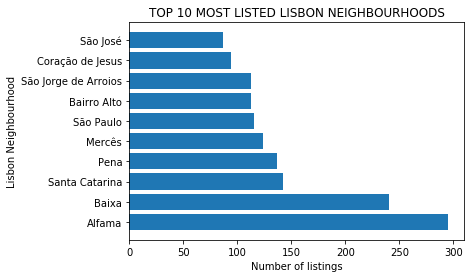

In [85]:
plt.barh(num_listings_per_lisbon_neighbourhood.index,num_listings_per_lisbon_neighbourhood)
plt.xlabel('Number of listings')
plt.ylabel('Lisbon Neighbourhood')
plt.title('TOP 10 MOST LISTED LISBON NEIGHBOURHOODS')

In [86]:
mean_prices_per_lisbon_neighbourhood = lisbon_listings.groupby(['neighbourhood'])['final_price'].mean()
mean_prices_per_lisbon_neighbourhood = mean_prices_per_lisbon_neighbourhood.sort_values(ascending=False).head(10)
mean_prices_per_lisbon_neighbourhood

neighbourhood
São Domingos de Benfica      409.771429
Benfica                      395.277778
Alto do Pina                 311.823529
Barcarena                    306.666667
Carnide                      247.000000
São Francisco Xavier         211.666667
Lumiar                       200.150000
Santa Isabel                 186.583333
São Sebastião da Pedreira    168.277778
Mercês                       164.588710
Name: final_price, dtype: float64

Text(0.5, 1.0, 'MEAN PRICES OF TOP 1O MOST LISTED LISBON NEIGHBOURHOODS')

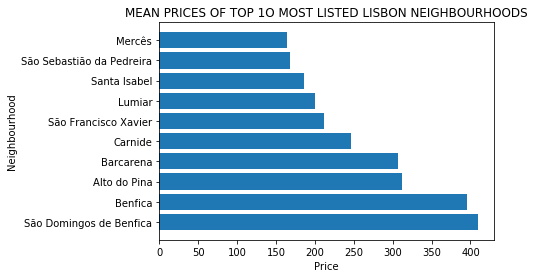

In [87]:
plt.barh(mean_prices_per_lisbon_neighbourhood.index,mean_prices_per_lisbon_neighbourhood)
plt.xlabel('Price')
plt.ylabel('Neighbourhood')
plt.title('MEAN PRICES OF TOP 1O MOST LISTED LISBON NEIGHBOURHOODS')